<a href="https://www.kaggle.com/code/rkaur05/gold-price-prediction?scriptVersionId=197639873" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection and Pre-processing

In [2]:
data=pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#basic information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
#number of rows and columns
data.shape

(2290, 6)

In [6]:
#Checking the number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#getting statistical measures of data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


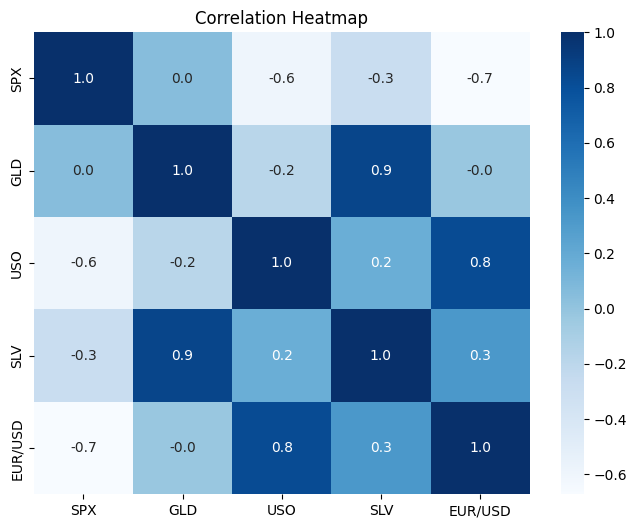

In [8]:
#Constructing heatmap to understand correlation
numeric_data=data.select_dtypes(include=['float64'])
correlation=numeric_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,cmap='Blues',annot=True,fmt='0.1f')
plt.title('Correlation Heatmap')
plt.show()

## Splitting features and Target

In [9]:

X=data.drop(['Date','GLD'],axis=1)
y=data['GLD']

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Training

In [11]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [12]:
reg.fit(X_train,y_train)

RandomForestRegressor()

## Model Evaluation

In [13]:
y_pred=reg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [15]:
print("r2_score:",score)

r2_score: 0.9903303685471949
